In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow as tf

In [3]:
# Load the dataset
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\Inter-iit-tech_12.0\Data\btcusdt_15m.csv')
data.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13556.15,123.616013
1,2018-01-01 05:45:00,13533.75,13550.87,13402.00,13521.12,98.136430
2,2018-01-01 06:00:00,13500.00,13545.37,13450.00,13470.41,79.904037
3,2018-01-01 06:15:00,13494.65,13690.87,13450.00,13529.01,141.699719
4,2018-01-01 06:30:00,13528.99,13571.74,13402.28,13445.63,72.537533


In [4]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.describe()

,datetime,open,high,low,close,volume
count,140786,140786.000000,140786.000000,140786.000000,140786.000000,140786.000000
mean,2020-01-08 04:51:12.475956480,18538.263824,18593.092786,18481.145507,18538.465949,570.248226
min,2018-01-01 05:30:00,3166.110000,3174.780000,3156.260000,3167.070000,0.000000
25%,2019-01-05 14:03:45,7100.692500,7119.962500,7082.257500,7100.717500,241.671367
50%,2020-01-08 10:22:30,9471.750000,9493.970000,9447.190000,9471.700000,391.625995
75%,2021-01-09 22:11:15,31561.367500,31683.902500,31432.910000,31564.037500,660.060297
max,2022-01-12 05:30:00,68718.890000,69000.000000,68480.000000,68718.900000,20821.081669
std,NaN,17824.371827,17878.331066,17768.811431,17824.489939,640.268439


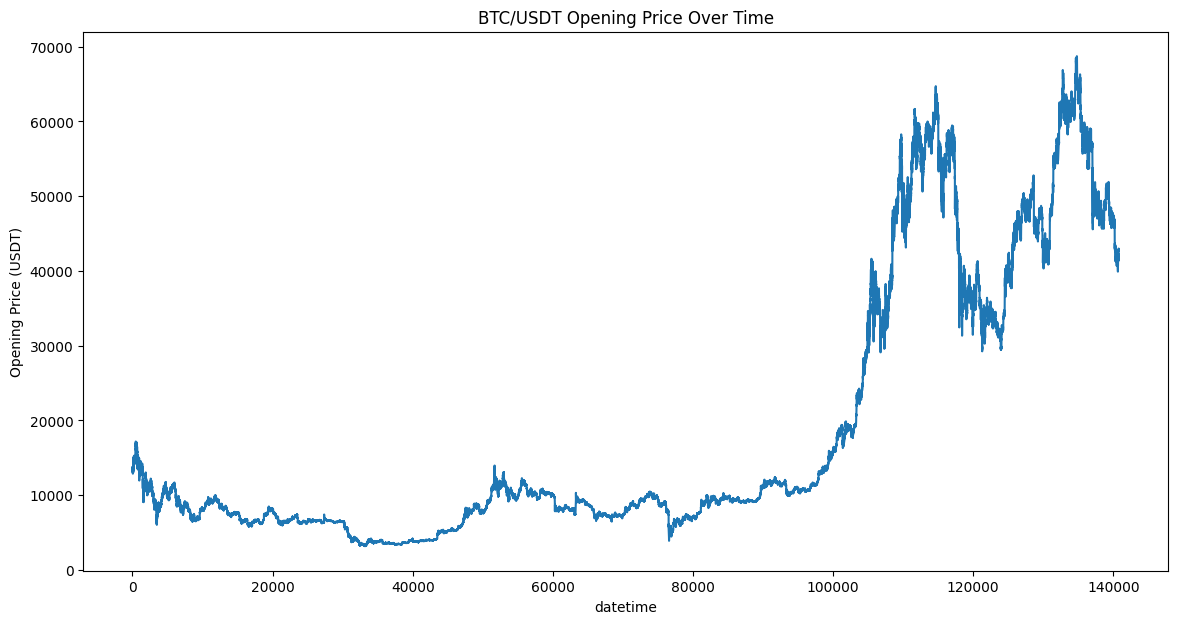

In [5]:
# Descriptive Analysis
data['open'].plot(figsize=(14, 7))
plt.title('BTC/USDT Opening Price Over Time')
plt.ylabel('Opening Price (USDT)')
plt.xlabel('datetime')
plt.show()

In [6]:
df = data.copy()

In [7]:
df['change'] = df['close'] - df['open']
df['change%'] = (df['close'] - df['open'])*100/df['open']
df.head()

,datetime,open,high,low,close,volume,change,change%
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13556.15,123.616013,-159.50,-1.162905
1,2018-01-01 05:45:00,13533.75,13550.87,13402.00,13521.12,98.136430,-12.63,-0.093322
2,2018-01-01 06:00:00,13500.00,13545.37,13450.00,13470.41,79.904037,-29.59,-0.219185
3,2018-01-01 06:15:00,13494.65,13690.87,13450.00,13529.01,141.699719,34.36,0.254619
4,2018-01-01 06:30:00,13528.99,13571.74,13402.28,13445.63,72.537533,-83.36,-0.616158


Input Data available OHLC for t < t-1, only O for t = t-1 and need to predict trade signal for time t. (t: 15 mins interval)

Experiments

1) Creating lag variables like simple moving average and exponential moving avg from the input data, of past 3hrs

In [8]:
# Moving Averages
window_size = 12 # window size of 3hrs
df['moving_avg_close'] = df['close'].shift(2).rolling(window=window_size, min_periods=1).mean()
df['moving_avg_open'] = df['open'].shift(1).rolling(window=window_size, min_periods=1).mean()
df['moving_avg_change%'] = df['change%'].shift(2).rolling(window=window_size, min_periods=1).mean()
df['moving_avg_high'] = df['high'].shift(2).rolling(window=window_size, min_periods=1).mean()
df['moving_avg_low'] = df['low'].shift(2).rolling(window=window_size, min_periods=1).mean()
df['vwcp'] = ((df['volume']*df['change%']).shift(2).rolling(window=window_size, min_periods=1).sum())/(df['volume'].shift(2).rolling(window=window_size, min_periods=1).sum())

# Exponential Moving Averages (EMA)
span = 12  # This defines the amount of "weight" given to the most recent values
df['ema_close'] = df['close'].shift(2).ewm(span=span, adjust=False).mean()
df['ema_open'] = df['open'].shift(1).ewm(span=span, adjust=False).mean()
df['ema_change%'] = df['change%'].shift(2).ewm(span=span, adjust=False).mean()
df['ema_high'] = df['high'].shift(2).ewm(span=span, adjust=False).mean()
df['ema_low'] = df['low'].shift(2).ewm(span=span, adjust=False).mean()

In [9]:
df['ema_open_pct_change'] = df['ema_open'].pct_change() * 100
df['open_pct_change'] = df['open'].pct_change() * 100

In [10]:
df.head(8)

,datetime,open,high,low,close,volume,change,change%,moving_avg_close,moving_avg_open,...,moving_avg_high,moving_avg_low,vwcp,ema_close,ema_open,ema_change%,ema_high,ema_low,ema_open_pct_change,open_pct_change
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13556.15,123.616013,-159.50,-1.162905,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 05:45:00,13533.75,13550.87,13402.00,13521.12,98.136430,-12.63,-0.093322,NaN,13715.650000,...,NaN,NaN,NaN,NaN,13715.650000,NaN,NaN,NaN,NaN,-1.326222
2,2018-01-01 06:00:00,13500.00,13545.37,13450.00,13470.41,79.904037,-29.59,-0.219185,13556.150000,13624.700000,...,13715.650000,13400.010000,-1.162905,13556.150000,13687.665385,-1.162905,13715.650000,13400.010000,-0.204034,-0.249377
3,2018-01-01 06:15:00,13494.65,13690.87,13450.00,13529.01,141.699719,34.36,0.254619,13538.635000,13583.133333,...,13633.260000,13401.005000,-0.689562,13550.760769,13658.793787,-0.998354,13690.299231,13400.316154,-0.210931,-0.039630
4,2018-01-01 06:30:00,13528.99,13571.74,13402.28,13445.63,72.537533,-83.36,-0.616158,13515.893333,13561.012500,...,13603.963333,13417.336667,-0.564966,13538.399112,13633.540897,-0.878482,13668.002426,13407.959822,-0.184884,0.254471
5,2018-01-01 06:45:00,13469.99,13595.89,13445.63,13560.00,87.861758,90.01,0.668226,13519.172500,13554.608000,...,13625.690000,13425.502500,-0.303021,13536.954634,13617.456143,-0.704159,13671.520514,13414.427542,-0.117979,-0.436101
6,2018-01-01 07:00:00,13559.99,13559.99,13430.00,13440.01,74.368405,-119.98,-0.884809,13504.464000,13540.505000,...,13614.900000,13420.858000,-0.347050,13522.904690,13594.769044,-0.690620,13656.169666,13412.558689,-0.166603,0.668152
7,2018-01-01 07:15:00,13440.01,13440.01,13155.38,13203.06,148.929310,-236.95,-1.763020,13513.720000,13543.288571,...,13611.731667,13424.986667,-0.199301,13528.611661,13589.418422,-0.481567,13646.895871,13417.646583,-0.039358,-0.884809


In [11]:
df1 = df.copy()[50:].reset_index(drop = True)
df1

,datetime,open,high,low,close,volume,change,change%,moving_avg_close,moving_avg_open,...,moving_avg_high,moving_avg_low,vwcp,ema_close,ema_open,ema_change%,ema_high,ema_low,ema_open_pct_change,open_pct_change
0,2018-01-01 18:00:00,13146.81,13245.55,13146.28,13200.01,66.739212,53.20,0.404661,13412.834167,13410.301667,...,13496.016667,13345.586667,-0.527304,13359.507659,13355.760870,-0.113565,13443.242721,13281.528544,-0.147327,-0.759169
1,2018-01-01 18:15:00,13200.01,13225.00,13117.72,13172.42,54.989819,-27.59,-0.209015,13379.199167,13378.217500,...,13462.465000,13306.006667,-0.566660,13326.683404,13323.614583,-0.213655,13413.109994,13246.867230,-0.240692,0.404661
2,2018-01-01 18:30:00,13150.05,13200.41,12815.70,13041.03,197.110695,-109.02,-0.829046,13345.867500,13344.885833,...,13432.094167,13275.695833,-0.556442,13307.195188,13304.598493,-0.118529,13387.331534,13231.392271,-0.142725,-0.378485
3,2018-01-01 18:45:00,13041.03,13056.88,12932.61,12977.16,90.293549,-63.87,-0.489762,13308.820000,13304.723333,...,13395.010833,13237.895000,-0.571071,13286.460543,13280.821802,-0.132450,13362.357452,13213.904230,-0.178710,-0.829046
4,2018-01-01 19:00:00,12977.16,13104.79,12921.72,13079.97,79.303100,102.81,0.792238,13266.405833,13262.309167,...,13356.885000,13177.509167,-0.610776,13248.701998,13243.930755,-0.239619,13337.442459,13152.642040,-0.277777,-0.489762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140731,2022-01-12 04:30:00,42713.12,42886.28,42665.26,42874.90,220.280580,161.78,0.378760,42748.234167,42748.469167,...,42845.057500,42701.076667,0.001613,42691.502670,42692.115337,-0.020391,42777.049824,42638.974874,-0.019210,0.155040
140732,2022-01-12 04:45:00,42874.90,42875.05,42758.00,42790.01,138.050550,-84.89,-0.197995,42726.657500,42726.892500,...,42819.177500,42686.946667,-0.086593,42694.829951,42695.346824,0.006602,42776.909851,42638.875663,0.007569,0.378760
140733,2022-01-12 05:00:00,42790.00,42822.21,42693.00,42790.03,158.322150,0.03,0.000070,42729.882500,42730.117500,...,42801.762500,42675.004167,0.009547,42722.533036,42722.970389,0.063857,42793.736028,42642.934792,0.064699,-0.198018
140734,2022-01-12 05:15:00,42790.04,42819.89,42633.97,42729.29,164.488730,-60.75,-0.141972,42728.732500,42729.050000,...,42798.968333,42671.504167,0.005571,42732.914107,42733.282637,0.023572,42806.245870,42660.637131,0.024137,0.000093


Testing correlation between above lag variables with opening price of time t,
calculated mse to check on an avg how much the lag variables deviate from the actual opening price

In [12]:
cols = ['moving_avg_close',	'moving_avg_open', 'moving_avg_high',	'moving_avg_low',	'ema_close',	'ema_open',	'ema_high',	'ema_low']
for col in cols:
  print(f'Correlation btw opening price and {col}:', df1['open'].corr(df1[col]))
  # print('avg mse:', ((df1['open'] - df1[col])**2).mean())

Correlation btw opening price and moving_avg_close: 0.9999159330039952
Correlation btw opening price and moving_avg_open: 0.9999159357825343
Correlation btw opening price and moving_avg_high: 0.9999038444680074
Correlation btw opening price and moving_avg_low: 0.999907416671106
Correlation btw opening price and ema_close: 0.9999344408972434
Correlation btw opening price and ema_open: 0.9999344427966503
Correlation btw opening price and ema_high: 0.999921495931576
Correlation btw opening price and ema_low: 0.9999272195016284


In [13]:
print(f"The correlation between the percentage changes is: {df1['open_pct_change'].corr(df1['ema_open_pct_change'])}")
print(f"The correlation between the abs percentage changes is: {abs(df1['open_pct_change']).corr(abs(df1['ema_open_pct_change']))}")

The correlation between the percentage changes is: -0.036428799015499
The correlation between the abs percentage changes is: 0.41160121797965443


In [14]:
# df1['lag_volume'] = df1['volume']).shift(1)
print(f'Correlation btw change% and volume:', df1['change%'].corr(df1['volume']))
print(f'Correlation btw abs change% and volume:', abs(df1['change%']).corr(df1['volume']))

print(f'Correlation btw change% and volume:', df1['change%'].corr(df1['volume'].shift(1)))
print(f'Correlation btw abs change% and volume:', abs(df1['change%']).corr(df1['volume'].shift(1)))

Correlation btw change% and volume: -0.0345069401743018
Correlation btw abs change% and volume: 0.5828226552034166
Correlation btw change% and volume: 0.01965795308294859
Correlation btw abs change% and volume: 0.325702243326792


Inference: Volume and change% for a particular time interval are not actualy correlated

3) Trying to checkout if moving averages of past change% can predict the current change% at time t.

In [15]:
cols = ['vwcp','moving_avg_change%', 'ema_change%']
for col in cols:
  print(f'Correlation btw change% and {col}:', df1['change%'].corr(df1[col]))
  print(f'abs Correlation btw change% and {col}:', abs(df1['change%']).corr(abs(df1[col])))
  # print('mse:', ((df1['change%'] - df1[col])**2).mean())
  # print(len(df1[df1['change%']*df1[col]<0]))

Correlation btw change% and vwcp: -0.013538330860117426
abs Correlation btw change% and vwcp: 0.27478451857540553
Correlation btw change% and moving_avg_change%: -0.02748450119502751
abs Correlation btw change% and moving_avg_change%: 0.361124416375671
Correlation btw change% and ema_change%: -0.033689237598814155
abs Correlation btw change% and ema_change%: 0.3764413380074697


Stationarity and Seasonality test

In [16]:
# filter
filter_width = 12
def gaussian_kernel_1d(filter_width):
    #99% of the values
    sigma = (filter_width)/2.33
    norm = 1.0 / (np.sqrt(2*np.pi) * sigma)
    kernel = [norm * np.exp((-1)*(x**2)/(2 * sigma**2)) for x in range(-filter_width, filter_width + 1)]
    return np.float32(kernel / np.sum(kernel))
kernel = gaussian_kernel_1d(filter_width)
filt_price = np.convolve(df1['open'], kernel, mode='valid')

# Padding to keep the same dimension
filt_price = np.concatenate([np.full(filter_width, filt_price[0]), filt_price, np.full(filter_width, filt_price[-1])])

price_centered = df1['open'] - filt_price

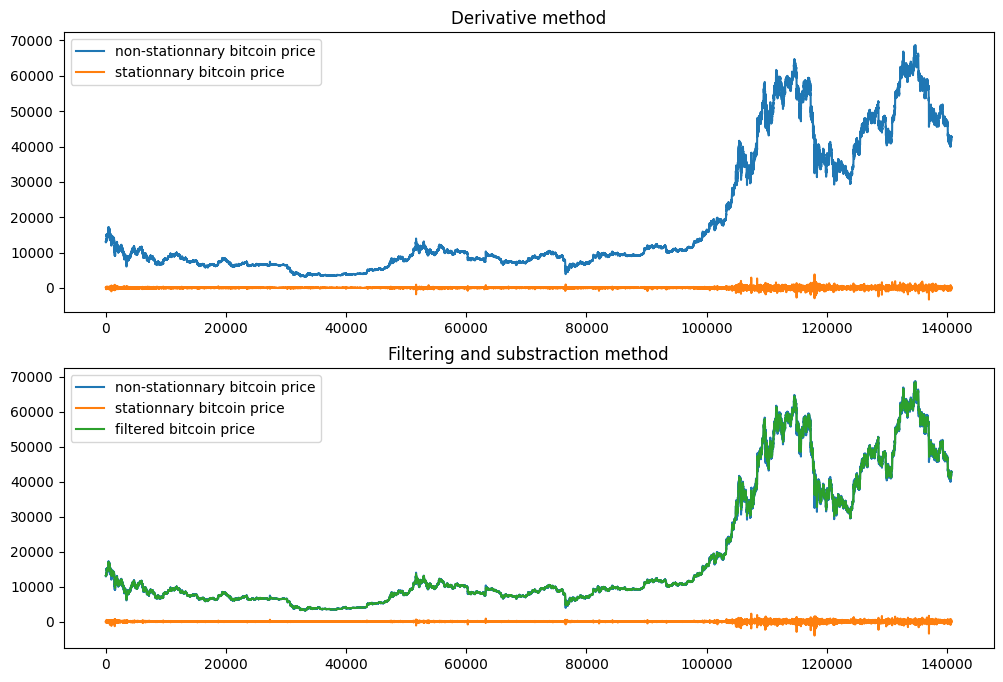

In [17]:
fig, axes = plt.subplots(2, figsize=(12, 8))
axes[0].plot(df1['open'], label="non-stationnary bitcoin price")
axes[0].plot(df1['change'], label="stationnary bitcoin price")
axes[0].set_title('Derivative method')
axes[0].legend(loc="upper left")
axes[1].plot(df1['open'], label="non-stationnary bitcoin price")
axes[1].plot(price_centered, label="stationnary bitcoin price")
axes[1].plot(filt_price, label="filtered bitcoin price")
axes[1].set_title('Filtering and substraction method')
axes[1].legend(loc="upper left")
# if figure_dir:
#     plt.savefig(os.path.join(figure_dir, "price_stationnarity.png"))
plt.show()
plt.close()

In [18]:
def autocorr(input, delay):
    input_delayed = np.roll(input, shift=delay)

    x1 = np.reshape(input, [1, -1, 1])
    x2 = np.reshape(input_delayed, [-1, 1, 1])
    result = np.reshape(np.convolve(x1.flatten(), x2.flatten(), mode='valid'), [-1])
    return result

# Autocorrelation of the raw price data
delays = np.arange(0, 12)
autocorr_price = [autocorr(df1['open'], hour) for hour in delays]
autocorr_centered_price = [autocorr(price_centered, hour) for hour in delays]

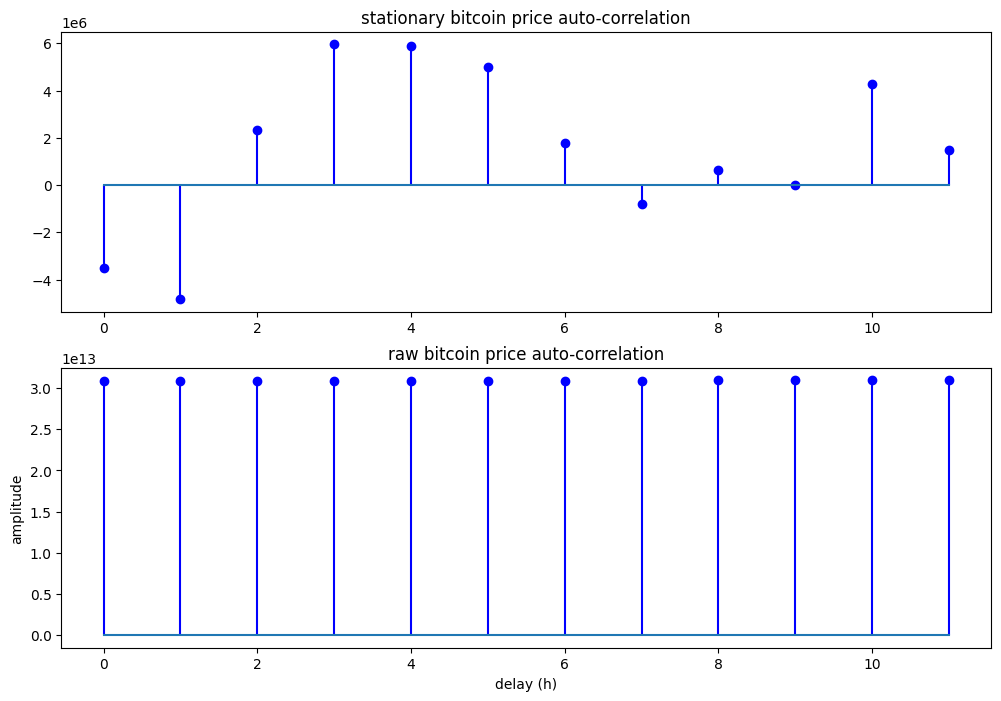

In [19]:
### plot
fig, axes = plt.subplots(2, figsize=(12, 8))
axes[0].stem(delays, autocorr_centered_price, linefmt='b-', markerfmt='bo', basefmt='')
axes[0].set_title('stationary bitcoin price auto-correlation')
axes[1].stem(delays, autocorr_price, linefmt='b-', markerfmt='bo', basefmt='')
axes[1].set_title('raw bitcoin price auto-correlation')
axes[1].set(xlabel='delay (h)', ylabel='amplitude')
# if figure_dir:
#     plt.savefig(os.path.join(figure_dir, "check_stationnarity.png"))
plt.show()
plt.close()

Positive Autocorrelation: If autocorrelation is positive at a certain lag, it indicates that high values tend to follow high values, and low values tend to follow low values with that time lag.

Negative Autocorrelation: Conversely, negative autocorrelation at a lag suggests an inverse relationship between values at the current time and values at the lagged time.

Seasonality:Autocorrelation can reveal the presence of seasonality in the data. Seasonal patterns may result in repeating cycles of high and low values with a consistent lag.

Modeling and Forecasting: Autocorrelation is essential for time series modeling and forecasting. A significant autocorrelation at specific lags can guide the choice of lag order in autoregressive integrated moving average (ARIMA) models or other time series models.

Max autocorrelation is around lag 3 for the stationary part, i.e 3x5=15mins, tick size would be ideal

In [20]:
# Assuming 'price_centered' is a NumPy array
# FFT on the stationary part
price_fourier = np.fft.fft(price_centered)
T = 1 #/ 24*12  # sampling interval in days
N = len(price_fourier)
frequencies = np.linspace(0, 1 / T, N)

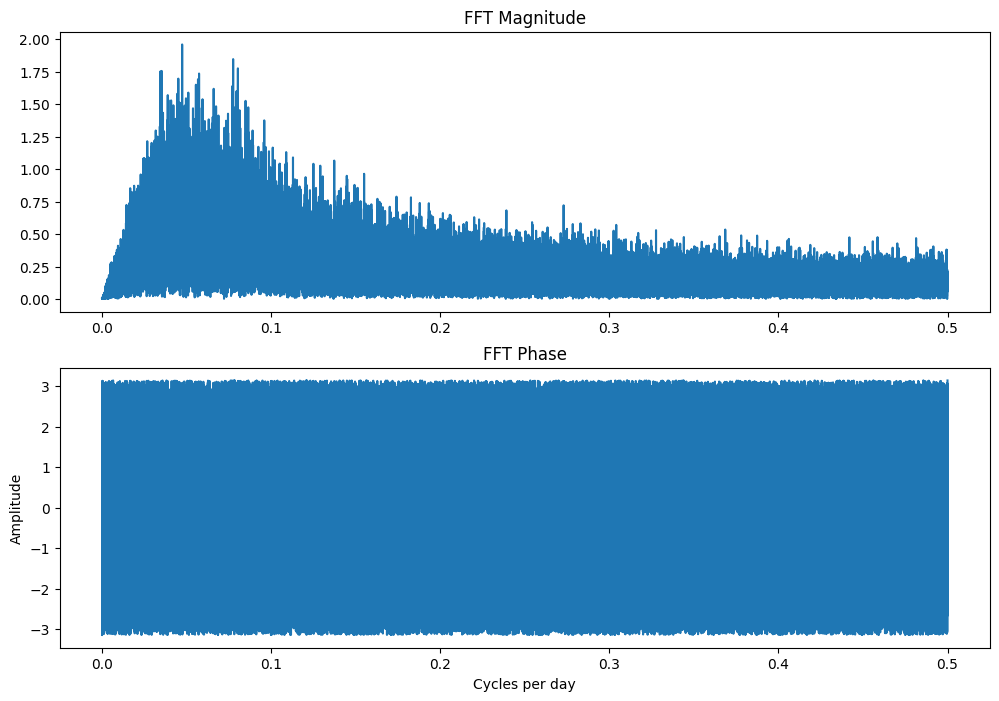

In [21]:
# Plotting
fig, axes = plt.subplots(2, figsize=(12, 8))
axes[0].plot(frequencies[:N // 2], np.abs(price_fourier)[:N // 2] * 1 / N)
axes[0].set_title('FFT Magnitude')
axes[1].plot(frequencies[:N // 2], np.angle(price_fourier)[:N // 2])
axes[1].set_title('FFT Phase')
axes[1].set(xlabel='Cycles per day', ylabel='Amplitude')

# Save the figure if figure_dir is provided
# if figure_dir:
#     plt.savefig(os.path.join(figure_dir, "fft.png"))

plt.show()
plt.close()

Peaks in the magnitude spectrum indicate dominant frequencies present in the signal.
The highest peak represents the fundamental frequency of the signal, which corresponds to the dominant cycle in the data.

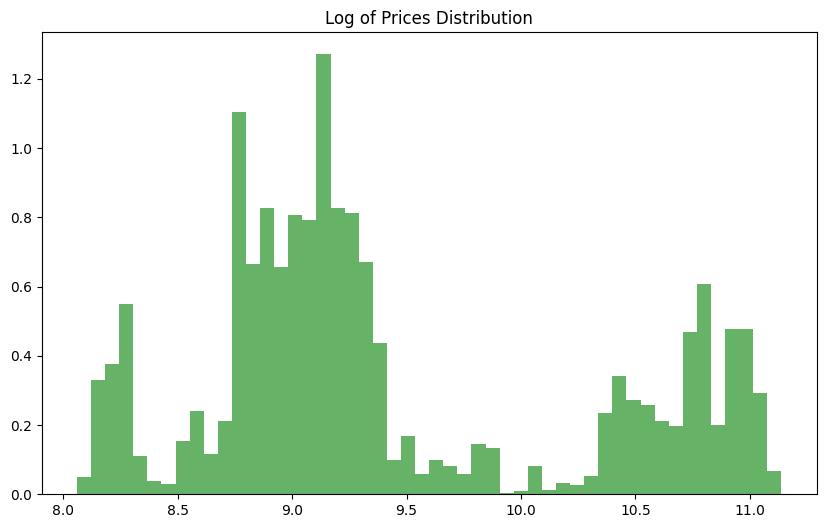

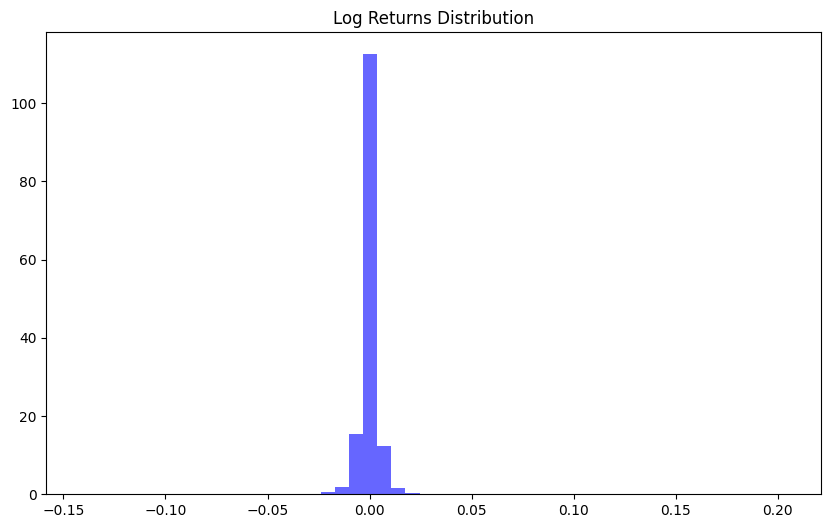

Shapiro-Wilk Test on Log Returns: ShapiroResult(statistic=0.7712103128433228, pvalue=0.0)


c:\Users\LENOVO\Desktop\Inter-iit-tech_12.0\techenv\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


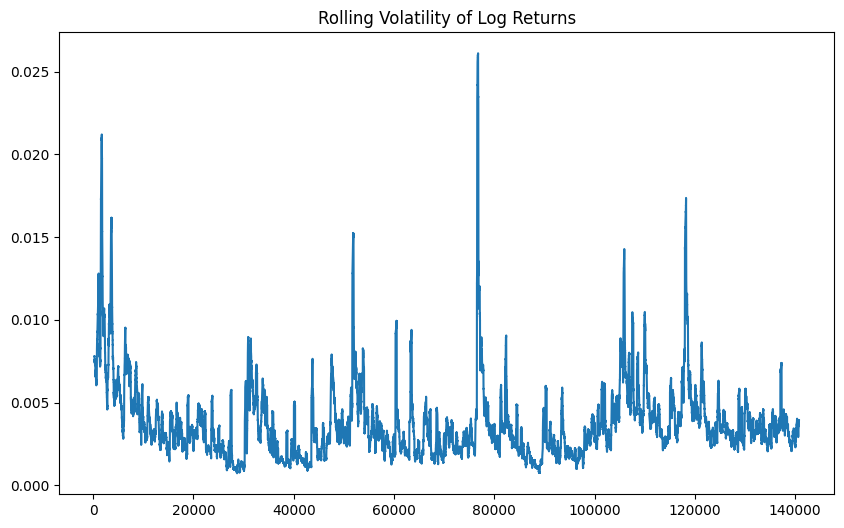

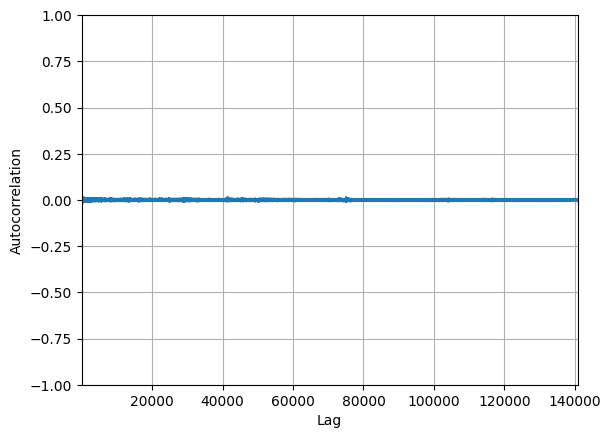

In [22]:
import scipy.stats as stats
# Assuming 'data' is your DataFrame with the asset's price data
# data = pd.read_csv('your_data.csv')

def check_gbm_properties(data):
    # Calculate log returns
    data['LogReturns'] = np.log(df['close'] /df['close'].shift(1))

    # 1. Test for log-normal distribution of prices
    prices_log = np.log(df['close'])
    plt.figure(figsize=(10, 6))
    plt.hist(prices_log, bins=50, alpha=0.6, color='g', density=True)
    plt.title('Log of Prices Distribution')
    plt.show()

    # 2. Test for normal distribution of log returns
    log_returns = df['LogReturns'].dropna()
    plt.figure(figsize=(10, 6))
    plt.hist(log_returns, bins=50, alpha=0.6, color='b', density=True)
    plt.title('Log Returns Distribution')
    plt.show()

    # Perform a Shapiro-Wilk test for normality
    shapiro_test = stats.shapiro(log_returns)
    print("Shapiro-Wilk Test on Log Returns:", shapiro_test)

    # 3. Check for constant volatility (std of log returns)
    rolling_volatility = log_returns.rolling(window=252).std()  # Adjust window size as needed
    rolling_volatility.plot(figsize=(10, 6), title="Rolling Volatility of Log Returns")
    plt.show()

    # 4. Check for independence of returns
    # Plotting autocorrelation plot of log returns
    pd.plotting.autocorrelation_plot(log_returns)
    plt.show()

# Run the checks
check_gbm_properties(df)


In [23]:
data.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13556.15,123.616013
1,2018-01-01 05:45:00,13533.75,13550.87,13402.00,13521.12,98.136430
2,2018-01-01 06:00:00,13500.00,13545.37,13450.00,13470.41,79.904037
3,2018-01-01 06:15:00,13494.65,13690.87,13450.00,13529.01,141.699719
4,2018-01-01 06:30:00,13528.99,13571.74,13402.28,13445.63,72.537533


In [69]:
def calculate_gbm_params(d):
    log_returns = np.log(d['close'] / d['close'].shift(1))
    mu = np.mean(log_returns)
    sigma = np.std(log_returns)
    return mu, sigma

def simulate_gbm(S0, mu, sigma, dt, N):
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    S = S0 * np.exp((mu - 0.5 * sigma**2) * np.linspace(0, N*dt, N) + sigma * W)
    return S

def generate_signals(d, mu, sigma, dt, dr):
    N = len(d)
    signals = np.zeros(N)
    last_action = 1  # Start with a buy
    du = dr.copy()
    nrows = pd.DataFrame(columns=d.columns)

    for i in range(1, N):
        simulated_price = simulate_gbm(d['close'][i-1], mu, sigma, dt, 1)[-1]
        if last_action == 1 and simulated_price < d['close'][i-1]:
            signals[i] = -1
            last_action = -1
        elif last_action == -1 and simulated_price > d['close'][i-1]:
            signals[i] = 1
            last_action = 1
        nrows = pd.concat([nrows, d.iloc[i-1]], ignore_index=True)
        # print(current_row)
        if i % 96 == 0:
            nrows.head()
            du = pd.concat([du, nrows], ignore_index=True)
            mu = calculate_gbm_params(du)[0]
            sigma = calculate_gbm_params(du)[1]
            nrows = pd.DataFrame(columns=d.columns)
    return signals


In [70]:
dftr = data[data['datetime'].dt.year <= 2019].copy()
mu, sigma = calculate_gbm_params(dftr)

In [71]:
dftr.columns
dftr.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13556.15,123.616013
1,2018-01-01 05:45:00,13533.75,13550.87,13402.00,13521.12,98.136430
2,2018-01-01 06:00:00,13500.00,13545.37,13450.00,13470.41,79.904037
3,2018-01-01 06:15:00,13494.65,13690.87,13450.00,13529.01,141.699719
4,2018-01-01 06:30:00,13528.99,13571.74,13402.28,13445.63,72.537533


In [72]:
dfts = data[data['datetime'].dt.year > 2019].copy().reset_index(drop=True)
dfts.head()

,datetime,open,high,low,close,volume
0,2020-01-01 00:00:00,7168.22,7174.04,7157.75,7170.73,168.907540
1,2020-01-01 00:15:00,7169.71,7171.91,7156.24,7168.86,169.017556
2,2020-01-01 00:30:00,7169.32,7170.41,7158.62,7159.63,280.735630
3,2020-01-01 00:45:00,7158.72,7182.14,7156.85,7175.55,163.905487
4,2020-01-01 01:00:00,7175.55,7178.93,7168.00,7174.61,160.193588


In [73]:
dt = 15 / (24 * 60)  # 15 minutes in terms of days
signals = generate_signals(dfts, mu, sigma, dt, dftr)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14208\796500465.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  du = pd.concat([du, nrows], ignore_index=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14208\796500465.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  du = pd.concat([du, nrows], ignore_index=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14208\796500465.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future

KeyboardInterrupt: 

In [ ]:
dfts['signal'] = signals
dfts.head()

,datetime,open,high,low,close,volume,signal
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13556.15,123.616013,0.0
1,2018-01-01 05:45:00,13533.75,13550.87,13402.00,13521.12,98.136430,-1.0
2,2018-01-01 06:00:00,13500.00,13545.37,13450.00,13470.41,79.904037,1.0
3,2018-01-01 06:15:00,13494.65,13690.87,13450.00,13529.01,141.699719,0.0
4,2018-01-01 06:30:00,13528.99,13571.74,13402.28,13445.63,72.537533,0.0


In [ ]:
value_counts = dfts['signal'].value_counts()

# Access counts of -1, 0, and 1
count_minus_one = value_counts.get(-1, 0)
count_zero = value_counts.get(0, 0)
count_one = value_counts.get(1, 0)

print("Count of -1:", count_minus_one)
print("Count of 0:", count_zero)
print("Count of 1:", count_one)

Count of -1: 35193
Count of 0: 70400
Count of 1: 35193
